<strong><font color='green' size="6" >APPLIED STATISTICS</font></strong> 

<strong><font color='green' size="4" >An example of linear regression</font></strong> 

# Problem statement
Your client is a real estate agent and wants some help predicting housing prices for regions in the USA. The client needs a model that allows to input few features of a house and returns back an estimate of what the house would sell for. The client provides the data which contains the following columns:

- **avg_area_income**: Avg. Income of residents of the city house is located in.
- **avg_area_house_age**: Avg. Age of houses in same city
- **avg_area_roomNb**: Avg. number of rooms for houses in same city
- **avg_area_bedroomNb**: Avg. number of bedrooms for houses in same city
- **area_population**: Population of city house is located in
- **house_price**: Price that the house sold at
- **house_address**: Address for the house

# Initialization

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

# Read data

In [5]:
houseData = pd.read_csv('housingData.csv')
houseData.head()

,avg_area_income,avg_area_house_age,avg_area_roomNb,avg_area_bedroomNb,area_population,house_price,house_address
0,79545,5.68,7,4,23087,1059034,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79249,6.00,7,3,40173,1505891,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,5.87,9,5,36882,1058988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7.19,6,3,34310,1260617,USS Barnett\nFPO AP 44820
4,59982,5.04,8,4,26354,630943,USNS Raymond\nFPO AE 09386


In [6]:
houseData.info() # grab data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
avg_area_income       5000 non-null int64
avg_area_house_age    5000 non-null float64
avg_area_roomNb       5000 non-null int64
avg_area_bedroomNb    5000 non-null int64
area_population       5000 non-null int64
house_price           5000 non-null int64
house_address         5000 non-null object
dtypes: float64(1), int64(5), object(1)
memory usage: 273.5+ KB


# Exploratory data analysis
## Descriptive analysis

In [4]:
houseData.describe().apply(round) # data summary

,avg_area_income,avg_area_house_age,avg_area_roomNb,avg_area_bedroomNb,area_population,house_price
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,68583.0,6.0,7.0,4.0,36164.0,1232073.0
std,10658.0,1.0,1.0,1.0,9926.0,353118.0
min,17797.0,3.0,3.0,2.0,173.0,15939.0
25%,61480.0,5.0,6.0,3.0,29404.0,997578.0
50%,68804.0,6.0,7.0,4.0,36199.0,1232669.0
75%,75783.0,7.0,8.0,4.0,42861.0,1471210.0
max,107702.0,10.0,11.0,7.0,69622.0,2469066.0


## Distribution check

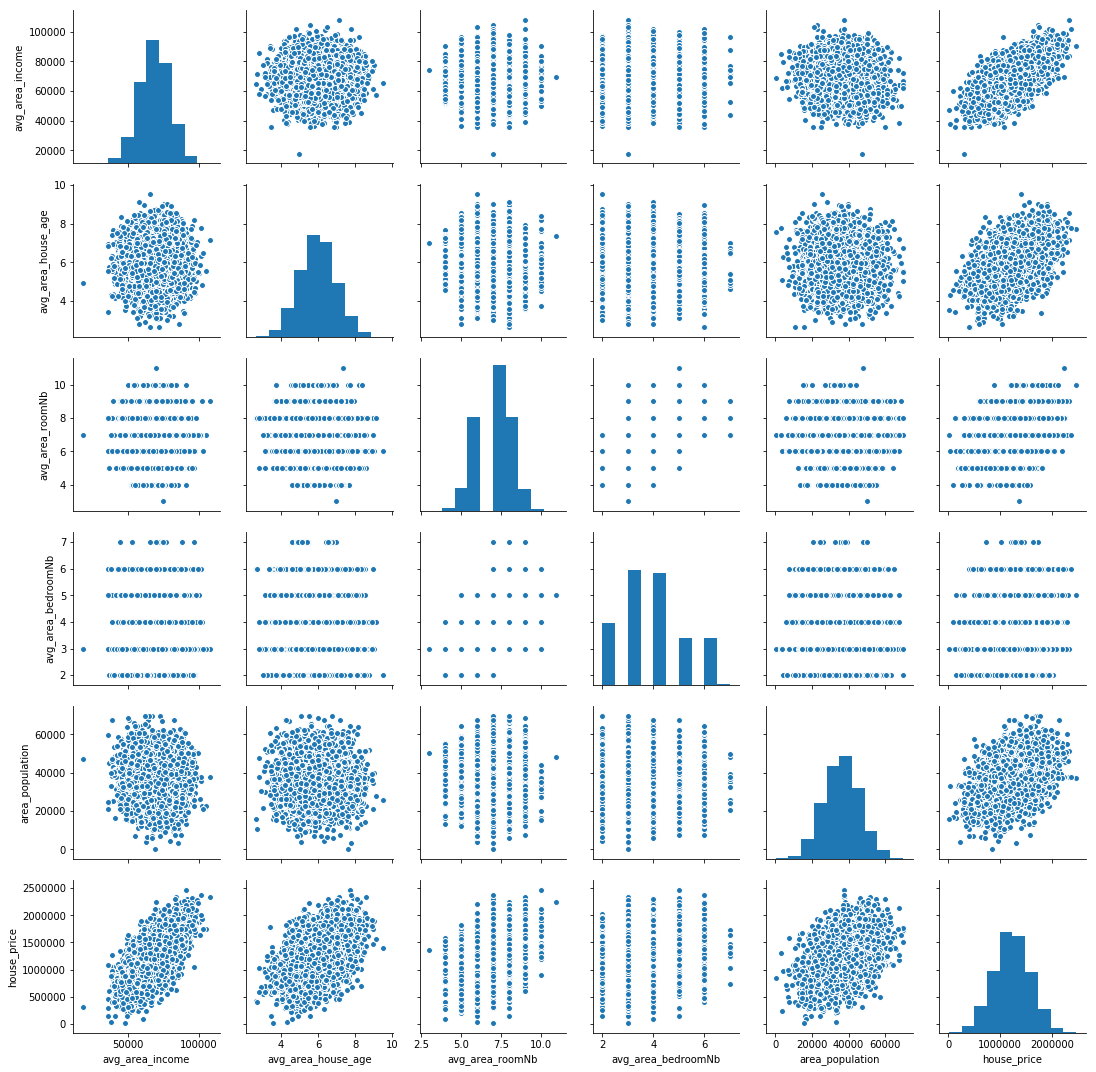

In [8]:
sns.pairplot(houseData)

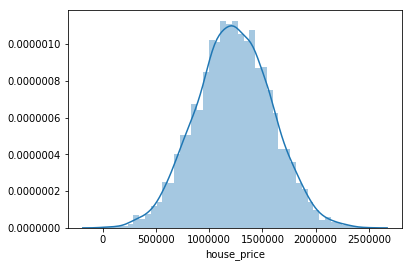

In [7]:
sns.distplot(houseData['house_price'])

The house price looks normally distributed.

## Correlation check

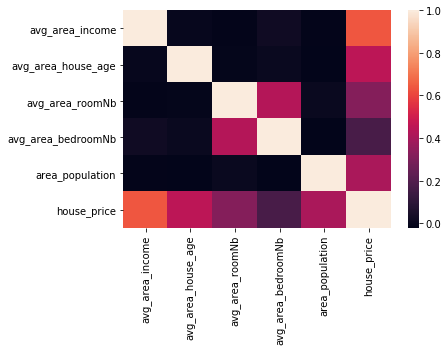

In [9]:
sns.heatmap(houseData.corr())

# Training a regression model
We will first split our data into an `X` array that contains the features to train on, and a `y` array with the target variable, in this case the `house_price` column. We will toss out the `house_address` column because it only has text info that the linear regression model can't use.

## Prepare `X` & `y` arrays

In [10]:
X = houseData[['avg_area_income', 
               'avg_area_house_age', 
               'avg_area_roomNb',
               'avg_area_bedroomNb', 
               'area_population']]
y = houseData['house_price']

## `train_test_split`
Now we split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=101)

## Training the Model

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model results
We evaluate the model by checking out it's coefficients and how we can interpret them.

In [13]:
print(lm.intercept_) # intercept

-2571651.814725602


In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
avg_area_income,21.490579
avg_area_house_age,165099.220993
avg_area_roomNb,109498.599576
avg_area_bedroomNb,9063.964081
area_population,15.065387


## Interpretation

- Keeping all other features fixed, a 1 unit increase in **avg_area_income** is associated with an **increase of 21.5 dollars**.
- Keeping all other features fixed, a 1 unit increase in **avg_area_house_age** is associated with an **increase of 165099 dollars**.
- Keeping all other features fixed, a 1 unit increase in **avg_area_roomNb** is associated with an **increase of 101000 **.
- Keeping all other features fixed, a 1 unit increase in **avg_area_bedroomNb** is associated with an **increase of 9065 **.
- Keeping all other features fixed, a 1 unit increase in **area_population** is associated with an **increase of 15 **.

Does this make sense? 

Probably not because we made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model
Let's predict on our test set and see how well it did.

In [15]:
predictions = lm.predict(X_test)

Plotting predicted Vs. actual

Text(0,0.5,'actual')

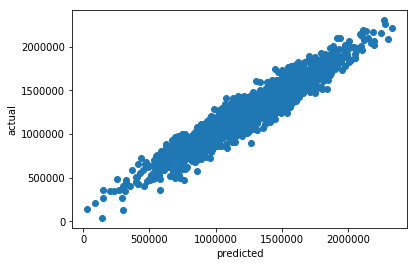

In [16]:
plt.scatter(y_test,predictions)
plt.xlabel('predicted')
plt.ylabel('actual')

Histogram of the residuals

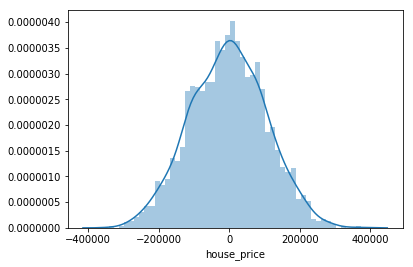

In [22]:
sns.distplot((y_test-predictions),bins=50);

## Model evaluation
The three common evaluation metrics for regression problems are
- **Mean Absolute Error** (MAE): the mean of the absolute value of the errors. It is the easiest to understand, because it's the average error.
    $$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
- **Mean Squared Error** (MSE): the mean of the squared errors. It is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
    $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
- **Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors It is even more popular than MSE, because RMSE is interpretable in the "y" units.
    $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

All of these are **loss functions**, because we want to minimize them.

In [17]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions) # MAE

86032.59792346123

In [18]:
metrics.mean_squared_error(y_test, predictions) # MSE

11475064946.015863

In [19]:
np.sqrt(metrics.mean_squared_error(y_test, predictions)) # RMSE

107121.72956975565